# Importa dependências

In [1]:
from numpy import arange, abs, array, pi, set_printoptions, diff

# from numpy import genfromtxt, zeros_like
# from scipy.optimize import minimize, differential_evolution
from sys import path as sph
from os.path import join, abspath, dirname
from pandas import read_excel

# import time
# import pickle
# import matplotlib.pyplot as plt

dir = dirname(
    r"c:\\Users\\INTEL\\Documents\\MEGA\\Mestrado\\00 Circuito DTG\\3. pyPB\\cases\\murilo\\teste1_calculate.py"
)
sph.append(abspath(join(dir, "..\\..\\..\\2. APP/")))
sph.append(abspath(join(dir, "..\\..")))
from pbe.app.dtg_class import (
    DTGSolution,
    Import_flow_DSD2,
    DTG_experiment,
    get_location,
)

set_printoptions(precision=4)

# Importa os testes

In [2]:
pasta = r"Documents\\MEGA\\Mestrado\\00 Circuito DTG\\6. Compilado\\LP_PB"
experiments = Import_flow_DSD2(get_location(pasta), teste={88: {1, 2}})

In [3]:
experiments.select_DTG(X=["E_ANM", "E_FlowLine"])
experiments.select_DTG(X=["E_ANM"])
# Como obter apenas uma DTG:
# ID vem de:
# experiments.compares['E_ANM'][0] ou [1], 0: antes, [1]: depois
# ID = experiments.compares['E_ANM'][0] ou experiments.compares['E_ANM'][1]
experiments.get_DTG(teste=88, marco=1, ID=3)

,N_escoam,Marco,tipo,ID,local,tempo,We,dinf,dsup,freq_v,freq_n,acum_v,GV_ANM,GV_choke,d_med
168,88,1.0,extrator,3,3,NaN,6.04,0.050,0.056,0.0,0.0,0.0,100.0,100.0,0.0530
169,88,1.0,extrator,3,3,NaN,6.04,0.056,0.063,0.0,0.0,0.0,100.0,100.0,0.0595
170,88,1.0,extrator,3,3,NaN,6.04,0.063,0.072,0.0,0.0,0.0,100.0,100.0,0.0675
171,88,1.0,extrator,3,3,NaN,6.04,0.072,0.081,0.0,0.0,0.0,100.0,100.0,0.0765
172,88,1.0,extrator,3,3,NaN,6.04,0.081,0.092,0.0,0.0,0.0,100.0,100.0,0.0865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,88,1.0,extrator,3,3,NaN,6.04,812.000,918.100,0.0,0.0,100.0,100.0,100.0,865.0500
248,88,1.0,extrator,3,3,NaN,6.04,918.100,1037.000,0.0,0.0,100.0,100.0,100.0,977.5500
249,88,1.0,extrator,3,3,NaN,6.04,1037.000,1173.000,0.0,0.0,100.0,100.0,100.0,1105.0000
250,88,1.0,extrator,3,3,NaN,6.04,1173.000,1326.000,0.0,0.0,100.0,100.0,100.0,1249.5000


# Calcula ou importa a perda de carga e propriedades

In [4]:
experiments.calc_DP_GV()
experiments.get_prop(dir)

# Define todos os dados experimentais em um objeto só

In [5]:
experiments.preparaDados()

In [6]:
experiments.dados

,N_emul,N_escoam,C_agua [%],Marco,ANM,TIT-02[°C],Densidade[kg/m³],FT-01[kg/min],DP[bar],Saline Water [Pa.s],Saline Water [kg/m³],AW68 [Pa.s],AW68 [kg/m³],W/O [Pa.s],W/O [kg/m³],sigma [N/m]
0,48,88,1,1,100,21.496962,874.041658,29.982250,0.798624,0.001070,1022.020652,0.150081,871.835006,0.138214,873.336481,0.0045
1,48,88,1,2,60,21.605671,874.189594,29.998394,0.805462,0.001068,1021.990249,0.149517,871.766778,0.137710,873.268900,0.0045


# Define a malha do balanço populacional

In [16]:
# Obtem as classe do Bettersizer e define a malha
# Create mesh
x = read_excel(dir + "/classes.xlsx")
# diameter is in micrometer and volume is in mm³
d, v = x["d"].to_numpy(), x["v [mm³]"].to_numpy()
dxi = diff(v)
xi = v[:-1] + diff(v) / 2
# Remover classes zeros
sl = slice(8, -12)
dxi, xi = dxi[sl], xi[sl]
M = len(xi)

experiments.reduce_DTG(M, sl)

Ja reduzido
Ja reduzido


# Define a função de simulação

In [60]:
def teste1_solve(M, xi, dxi, C, t, IDs, marco, exp, data):
    mp = array(C)
    #mp[3] *= 1e13
    pbe_solutions = DTGSolution(
        M=M,
        xi=xi,
        dxi=dxi,
        time=t,
        exp=exp,
        data=data,
        IDs=IDs,
        marco=marco,
        model_parameters=mp,
    )

    return pbe_solutions

# Roda a simulação

In [17]:
xi

array([1.4995e-12, 2.1698e-12, 3.1392e-12, 4.5653e-12, 6.6097e-12,
       9.5221e-12, 1.3808e-11, 1.9995e-11, 2.8820e-11, 4.1668e-11,
       6.0212e-11, 8.7162e-11, 1.2619e-10, 1.8197e-10, 2.6311e-10,
       3.8018e-10, 5.4969e-10, 7.9480e-10, 1.1487e-09, 1.6597e-09,
       2.3981e-09, 3.4652e-09, 5.0098e-09, 7.2422e-09, 1.0462e-08,
       1.5120e-08, 2.1857e-08, 3.1591e-08, 4.5644e-08, 6.5949e-08,
       9.5299e-08, 1.3774e-07, 1.9908e-07, 2.8770e-07, 4.1575e-07,
       5.9991e-07, 8.6674e-07, 1.2527e-06, 1.8105e-06, 2.6150e-06,
       3.7804e-06, 5.4669e-06, 7.9020e-06, 1.1419e-05, 1.6503e-05,
       2.3850e-05, 3.4463e-05, 4.9812e-05, 7.1987e-05, 1.0404e-04,
       1.5037e-04, 2.1732e-04, 3.1400e-04, 4.5369e-04, 6.5498e-04,
       9.4624e-04, 1.3675e-03, 1.9777e-03, 2.8597e-03, 4.1320e-03,
       5.9713e-03, 8.6253e-03, 1.2466e-02, 1.8018e-02])

In [67]:
C0 = [0.3372, 0.1098, 1.3237e-2, 0.262]
t = arange(0.0, 1.0, 0.01)
IDs = experiments.compares["E_ANM"]
marco = 1
sol = teste1_solve(
    M, xi/1e9,  # mm³ to m³
    dxi/1e9,  # mm³ to m³
    C0, t, IDs, marco, experiments.dados.iloc[0], experiments
)

geometric


In [53]:
sol.moc.xi

array([1.4995e-21, 2.1698e-21, 3.1392e-21, 4.5653e-21, 6.6097e-21,
       9.5221e-21, 1.3808e-20, 1.9995e-20, 2.8820e-20, 4.1668e-20,
       6.0212e-20, 8.7162e-20, 1.2619e-19, 1.8197e-19, 2.6311e-19,
       3.8018e-19, 5.4969e-19, 7.9480e-19, 1.1487e-18, 1.6597e-18,
       2.3981e-18, 3.4652e-18, 5.0098e-18, 7.2422e-18, 1.0462e-17,
       1.5120e-17, 2.1857e-17, 3.1591e-17, 4.5644e-17, 6.5949e-17,
       9.5299e-17, 1.3774e-16, 1.9908e-16, 2.8770e-16, 4.1575e-16,
       5.9991e-16, 8.6674e-16, 1.2527e-15, 1.8105e-15, 2.6150e-15,
       3.7804e-15, 5.4669e-15, 7.9020e-15, 1.1419e-14, 1.6503e-14,
       2.3850e-14, 3.4463e-14, 4.9812e-14, 7.1987e-14, 1.0404e-13,
       1.5037e-13, 2.1732e-13, 3.1400e-13, 4.5369e-13, 6.5498e-13,
       9.4624e-13, 1.3675e-12, 1.9777e-12, 2.8597e-12, 4.1320e-12,
       5.9713e-12, 8.6253e-12, 1.2466e-11, 1.8018e-11])

In [23]:
from numpy import sum, dot
from pandas import Series

In [62]:
sol.moc.total_volume

0.009086015306110381

In [56]:
dot(sol.moc.N, sol.moc.xi)

array([0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01])

In [57]:
sol.moc.N[0]

array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 3.0008e+14, 5.8988e+14, 9.5996e+14,
       1.1626e+15, 1.2391e+15, 1.1490e+15, 9.7270e+14, 7.9055e+14,
       5.9445e+14, 4.6571e+14, 3.6865e+14, 3.0557e+14, 2.5547e+14,
       2.0558e+14, 1.5699e+14, 1.1338e+14, 7.7601e+13, 5.1326e+13,
       3.3201e+13, 2.1320e+13, 1.3517e+13, 8.4786e+12, 5.3071e+12,
       3.3684e+12, 2.2144e+12, 1.5120e+12, 1.0532e+12, 7.3842e+11,
       4.8674e+11, 3.0805e+11, 1.7642e+11, 9.4451e+10, 4.6654e+10,
       2.2220e+10, 1.0426e+10, 5.0620e+09, 2.4520e+09, 9.6952e+08,
       2.9351e+08, 2.9017e+07, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00])

In [31]:
import matplotlib.pyplot as plt

[]

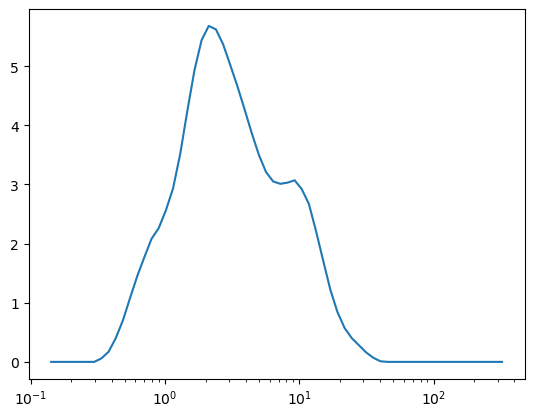

In [58]:
a = experiments.get_DTG(teste=88, marco = 1, ID = 2)['d_med']
b = experiments.get_DTG(teste=88, marco = 1, ID = 2)['freq_v']
plt.plot(a,b)
plt.semilogx()

In [66]:
sol.moc.Q[-1]

array([5.3639e-09, 5.3652e-09, 5.3666e-09, 5.3682e-09, 5.3699e-09,
       5.3717e-09, 5.3737e-09, 5.3758e-09, 5.3781e-09, 5.3807e-09,
       5.3834e-09, 5.3864e-09, 5.3896e-09, 5.3931e-09, 5.3969e-09,
       5.4010e-09, 5.4054e-09, 5.4103e-09, 5.4155e-09, 5.4212e-09,
       5.4274e-09, 5.4341e-09, 5.4414e-09, 5.4493e-09, 5.4578e-09,
       5.4671e-09, 5.4772e-09, 5.4882e-09, 5.5000e-09, 5.5130e-09,
       5.5270e-09, 5.5423e-09, 5.5590e-09, 5.5771e-09, 5.5969e-09,
       5.6183e-09, 5.6419e-09, 5.6677e-09, 5.6961e-09, 5.7272e-09,
       5.7616e-09, 5.7997e-09, 5.8420e-09, 5.8892e-09, 5.9420e-09,
       6.0016e-09, 6.0692e-09, 6.1464e-09, 6.2352e-09, 6.3382e-09,
       6.4587e-09, 6.6008e-09, 6.7698e-09, 6.9726e-09, 7.2178e-09,
       7.5177e-09, 7.8875e-09, 8.3476e-09, 8.9227e-09, 9.6452e-09,
       1.0560e-08, 1.1723e-08, 1.3213e-08, 1.5128e-08])

[]

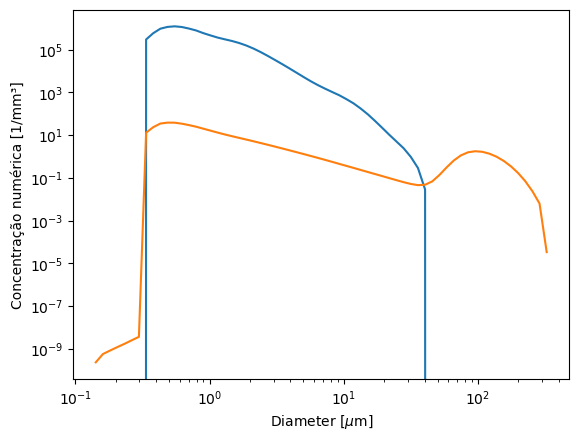

In [63]:
plt.plot(sol.moc.xi_d*1e6, sol.moc.N[0]/1e9)
plt.plot(sol.moc.xi_d*1e6, sol.moc.N[-1]/1e9)
plt.xlabel(r'Diameter [$\mu$m]')
plt.ylabel(r'Concentração numérica [1/mm³]')
plt.semilogx()
plt.semilogy()
# Ta certo!

[]

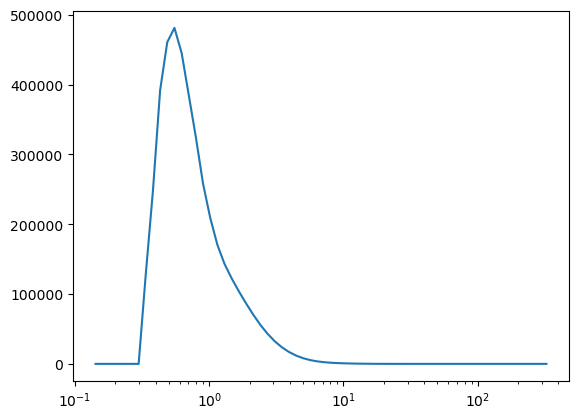

In [34]:
plt.plot(sol.moc.xi_d*1e6, sol.moc.N[1]/1e9)
plt.semilogx()

In [35]:
(6 / pi * sum(sol.moc.N[0] * sol.moc.xi) / sum(sol.moc.N[0])) ** (1.0 / 3)*1e6

1.246949809844661